In [1]:
import tensorflow as tf

# GPU를 사용할 수 있는지 확인
gpu_available = tf.config.list_physical_devices('GPU')

if gpu_available:
    print("GPU를 사용할 수 있습니다.")
    # GPU 디바이스 정보 출력
    for gpu in gpu_available:
        print("GPU 디바이스:", gpu)
else:
    print("GPU를 사용할 수 없습니다.")

GPU를 사용할 수 없습니다.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

from pandas import read_csv, unique

import numpy as np
import pandas as pd

from scipy.interpolate import interp1d
from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow import stack
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.layers import Dense, GlobalAveragePooling1D, BatchNormalization, MaxPool1D, Reshape, Activation
from tensorflow.keras.layers import Conv1D, Flatten, Reshape, MaxPooling1D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from keras import layers

In [8]:
import pandas as pd

df = pd.read_csv("C:/Users/PC/OneDrive - gachon.ac.kr/바탕 화면/ai-study/mhealth_full.csv")
df

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity,subject
0,-9.8184,0.009971,0.29563,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-0.370000,...,-4.5781,0.187760,-0.449020,-1.01030,0.034483,-2.35000,-1.610200,-0.030899,0,subject1
1,-9.8489,0.524040,0.37348,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-0.197990,...,-4.3198,0.023595,-0.449020,-1.01030,0.034483,-2.16320,-0.882540,0.326570,0,subject1
2,-9.6602,0.181850,0.43742,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-0.374170,...,-4.2772,0.275720,-0.449020,-1.01030,0.034483,-1.61750,-0.165620,-0.030693,0,subject1
3,-9.6507,0.214220,0.24033,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-0.017271,...,-4.3163,0.367520,-0.456860,-1.00820,0.025862,-1.07710,0.006945,-0.382620,0,subject1
4,-9.7030,0.303890,0.31156,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-0.374390,...,-4.1459,0.407290,-0.456860,-1.00820,0.025862,-0.53684,0.175900,-1.095500,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,-9.2476,-0.248070,-2.62230,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-0.687640,...,-8.9071,0.294230,0.041176,-0.99384,-0.480600,2.40890,7.496100,7.915500,0,subject10
1215741,-9.4632,-0.073513,-2.11190,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-0.868190,...,-8.7455,0.448140,0.041176,-0.99384,-0.480600,1.69450,7.866000,7.897500,0,subject10
1215742,-9.4011,-0.144580,-3.02350,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-0.868410,...,-9.1155,0.450480,0.041176,-0.99384,-0.480600,1.15770,8.052800,7.884900,0,subject10
1215743,-9.3732,-0.026252,-2.70760,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-0.339790,...,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0.27441,9.487900,5.325800,0,subject10


In [55]:
df = df[['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z','gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z','acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z','mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity']]

In [56]:
df.head()

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity
6656,-9.7788,0.55690,1.19750,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,0.56366,...,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0
6657,-9.7733,0.27880,0.73036,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,0.56810,...,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,0.719910,0.17803,0.37363,0
6658,-9.8609,0.11561,0.79988,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,0.21110,...,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,0.355370,-0.37003,-0.35020,0
6659,-9.7409,0.17652,0.88957,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,0.21565,...,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,0.357180,-0.18858,-0.35198,0
6660,-9.7821,0.21637,0.90368,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,0.56810,...,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,-0.001887,-0.18867,-0.72017,0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343195 entries, 6656 to 1213645
Data columns (total 22 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   acc_ch_x  343195 non-null  float64
 1   acc_ch_y  343195 non-null  float64
 2   acc_ch_z  343195 non-null  float64
 3   acc_la_x  343195 non-null  float64
 4   acc_la_y  343195 non-null  float64
 5   acc_la_z  343195 non-null  float64
 6   gyr_la_x  343195 non-null  float64
 7   gyr_la_y  343195 non-null  float64
 8   gyr_la_z  343195 non-null  float64
 9   mag_la_x  343195 non-null  float64
 10  mag_la_y  343195 non-null  float64
 11  mag_la_z  343195 non-null  float64
 12  acc_rw_x  343195 non-null  float64
 13  acc_rw_y  343195 non-null  float64
 14  acc_rw_z  343195 non-null  float64
 15  gyr_rw_x  343195 non-null  float64
 16  gyr_rw_y  343195 non-null  float64
 17  gyr_rw_z  343195 non-null  float64
 18  mag_rw_x  343195 non-null  float64
 19  mag_rw_y  343195 non-null  float64
 20  mag_r

In [58]:
df.describe()

,acc_ch_x,acc_ch_y,acc_ch_z,acc_la_x,acc_la_y,acc_la_z,gyr_la_x,gyr_la_y,gyr_la_z,mag_la_x,...,acc_rw_x,acc_rw_y,acc_rw_z,gyr_rw_x,gyr_rw_y,gyr_rw_z,mag_rw_x,mag_rw_y,mag_rw_z,activity
count,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,...,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000,343195.000000
mean,-7.485271,-0.140923,-0.938418,1.805184,-9.061487,-0.701985,0.101167,-0.549942,-0.121145,0.327602,...,-3.448201,-5.781446,2.381165,-0.201574,-0.410515,0.380693,-0.532629,1.422140,0.030670,5.989997
std,5.701949,2.799380,4.611164,4.214175,5.200389,6.457622,0.458913,0.434721,0.555923,76.462811,...,5.891595,6.578371,4.177971,0.549524,0.546359,0.515658,34.216257,30.285262,82.663004,3.563912
min,-22.438000,-20.188000,-18.401000,-22.146000,-19.619000,-19.373000,-1.779200,-2.660400,-2.626700,-357.560000,...,-22.345000,-18.972000,-18.238000,-1.170600,-2.256700,-1.114200,-319.030000,-358.130000,-702.570000,0.000000
25%,-9.707100,-1.294300,-3.686550,0.159875,-10.063000,-3.494350,-0.345080,-0.810510,-0.567780,-16.487000,...,-5.013900,-9.558100,0.139070,-0.682350,-0.831620,-0.040948,-6.228350,-7.272000,-12.170000,3.000000
50%,-8.800300,-0.292570,-0.881070,1.372500,-9.597700,0.340070,0.204080,-0.688560,-0.098232,0.180780,...,-2.480000,-7.738900,1.819100,-0.300000,-0.597540,0.448280,0.360740,0.353930,-0.709300,6.000000
75%,-5.117400,0.984775,1.092650,2.924450,-7.549800,1.819300,0.487940,-0.487800,0.349710,4.200550,...,-0.539050,-2.359550,5.324750,0.278430,-0.045175,0.840520,5.224000,8.350250,10.302500,9.000000
max,19.094000,20.927000,26.196000,20.024000,21.161000,25.015000,1.710600,1.752300,1.581500,339.220000,...,19.801000,21.965000,25.741000,1.415700,1.121100,1.528000,239.690000,335.250000,657.180000,12.000000


In [59]:
df.columns

Index(['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z', 'activity'],
      dtype='object')

In [60]:
df['activity'].value_counts()

activity
0     30720
1     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [61]:
df.shape

(343195, 22)

In [62]:
df['activity'].value_counts()

activity
0     30720
1     30720
3     30720
4     30720
9     30720
10    30720
11    30720
5     30720
7     29441
8     29337
6     28315
12    10342
Name: count, dtype: int64

In [63]:
df.shape

(343195, 22)

In [64]:
X = df[['acc_ch_x', 'acc_ch_y', 'acc_ch_z', 'acc_la_x', 'acc_la_y', 'acc_la_z',
       'gyr_la_x', 'gyr_la_y', 'gyr_la_z', 'mag_la_x', 'mag_la_y', 'mag_la_z',
       'acc_rw_x', 'acc_rw_y', 'acc_rw_z', 'gyr_rw_x', 'gyr_rw_y', 'gyr_rw_z',
       'mag_rw_x', 'mag_rw_y', 'mag_rw_z']].values
y = df['activity'].values.reshape(-1, 1)

##### X: 특성(피처) 데이터셋입니다.
##### y: 타겟(레이블) 데이터셋입니다.
##### test_size=0.2: 전체 데이터셋의 20%를 테스트 세트로 분할합니다.
##### stratify=y: 타겟 변수 y의 비율을 유지하며 분할합니다. 이는 클래스 불균형 문제를 완화할 수 있습니다.
##### 첫 번째 분할에서 생성된 X_train과 y_train을 다시 분할합니다.
##### test_size=0.2: 학습 세트의 20%를 검증 세트로 분할합니다.
##### stratify=y_train: 학습 세트의 타겟 변수 y_train의 비율을 유지하며 분할합니다.
##### 최종 학습 세트 (X_train, y_train)의 크기를 출력합니다.
##### 테스트 세트 (X_test, y_test)의 크기를 출력합니다.
##### 이 출력문을 통해 각 데이터셋의 샘플 수와 피처 수를 확인할 수 있습니다.

In [65]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify= y)
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size = 0.2, stratify= y_train )
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(219644, 21) (219644, 1)
(68639, 21) (68639, 1)


##### X_train.shape[0]: 학습 세트의 샘플 수입니다.
##### X_train.shape[1]: 학습 세트의 피처 수입니다.
##### .reshape((X_train.shape[0], X_train.shape[1], 1)): 각 샘플의 피처 수에 차원을 추가하여 (샘플 수, 피처 수, 1) 형태로 변환합니다.
##### X_train의 새로운 형태를 출력합니다.
##### X_test의 새로운 형태를 출력합니다.

In [66]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(219644, 21, 1)
(68639, 21, 1)


#### 1.OneHotEncoder 객체 생성
##### handle_unknown="ignore": 훈련 시 보지 못한 새로운 카테고리 값이 나타나면 무시합니다.
##### sparse_output=False: 인코딩된 결과를 희소 행렬이 아닌 밀집 행렬로 반환합니다. (sparse_output은 sklearn 버전에 따라 다를 수 있음)
#### 2.학습 데이터에 대해 인코더 학습
##### y_train 데이터를 이용하여 인코더를 학습시킵니다. 즉, y_train에 존재하는 고유 클래스들을 인코더가 학습합니다.
#### 3.데이터 변환:
##### y_train, y_test, y_val 데이터를 원-핫 인코딩 방식으로 변환합니다. 이 결과 각 클래스는 고유한 원-핫 벡터로 변환됩니다.
#### 4.고유 클래스 수 확인:
##### np.unique(y_train_hot)를 이용하여 원-핫 인코딩된 y_train_hot의 고유한 값(클래스) 수를 계산합니다.
##### len() 함수를 통해 고유 클래스의 개수를 반환합니다.

In [67]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [68]:
n_status = len(np.unique(y_train_hot))
n_status

2

#### 1. Transformer Encoder 함수 정의
##### Transformer의 인코더 부분을 정의합니다. 이 부분은 입력 데이터를 받아서 Multi-Head Attention과 Feed Forward Network를 적용한 결과를 반환합니다.
#### 2. 모델 구축 함수 정의
##### Transformer 인코더 블록을 포함한 모델을 정의합니다.
#### 3. 모델 설정 및 컴파일
##### 모델을 빌드하고 컴파일합니다.
##### transformer_encoder 함수는 입력 데이터를 Transformer 인코더 구조로 처리합니다.
##### build_model 함수는 Transformer 인코더 블록과 MLP(다층 퍼셉트론) 블록을 포함하는 전체 모델을 빌드합니다.
##### 마지막으로 모델을 컴파일하여 훈련할 준비를 합니다.
##### categorical_crossentropy 손실 함수와 Adam 옵티마이저를 사용하여 다중 클래스 분류 작업을 수행합니다.

In [69]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train_hot = y_train_hot[idx]

In [70]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [71]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_status, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout):
    model = Sequential()
    # Transformer 블록 추가 (단일 블록 예시)
    model.add(Flatten(input_shape=input_shape))  # 입력 데이터의 형태를 1D로 변환
    # Transformer 레이어 (여기서는 예시로 Dense 레이어를 사용)
    model.add(Dense(head_size, activation='relu'))
    # 다중 층 퍼셉트론 (MLP) 구성
    for dim in mlp_units:
        model.add(Dense(dim, activation='relu'))
        model.add(Dropout(mlp_dropout))
    # 최종 출력 레이어
    model.add(Dense(12, activation='softmax'))  # 12개의 클래스를 예측하는 출력 레이어

    return model

input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",  # 다중 클래스 분류에 적합한 손실 함수
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

##### 필요한 모듈을 임포트합니다.
##### Transformer 인코더와 모델 빌드 함수를 정의합니다.
##### 데이터를 전처리하고 모델을 빌드 및 컴파일합니다.
##### 모델을 학습시킵니다.

In [73]:
train_epochs = 30
history = model.fit(X_train, y_train_hot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 720us/step - accuracy: 0.5586 - loss: 2.1314 - val_accuracy: 0.8444 - val_loss: 0.4233
Epoch 2/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 715us/step - accuracy: 0.8153 - loss: 0.4955 - val_accuracy: 0.8808 - val_loss: 0.3120
Epoch 3/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 701us/step - accuracy: 0.8586 - loss: 0.3782 - val_accuracy: 0.9027 - val_loss: 0.2672
Epoch 4/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 703us/step - accuracy: 0.8803 - loss: 0.3205 - val_accuracy: 0.9181 - val_loss: 0.2242
Epoch 5/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 693us/step - accuracy: 0.8950 - loss: 0.2846 - val_accuracy: 0.9279 - val_loss: 0.1985
Epoch 6/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 701us/step - accuracy: 0.9061 - loss: 0.2533 - val_accuracy: 0.9370 - val_loss: 0.1773
Epoch 7/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 714us/step - accuracy: 0.9143 - loss: 0.2323 - val_accuracy: 0.9411 - val_loss: 0.1623
Epoch 8/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 698us/step - accuracy: 0.9208 -

# 수치화

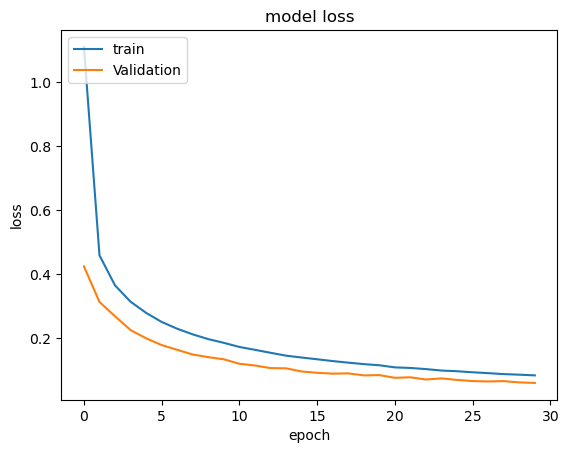

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

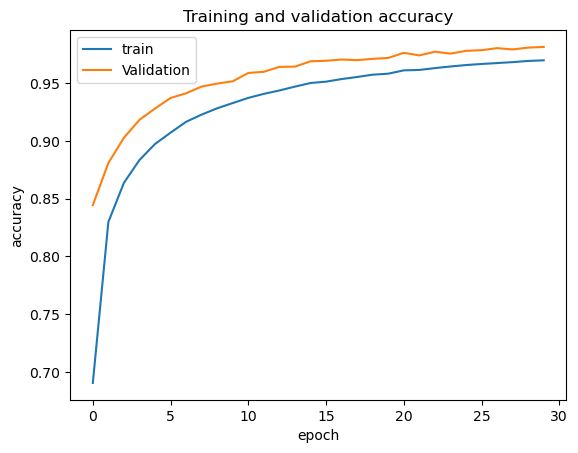

In [75]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

## 필요한 모듈 임포트 및 예측 수행

2145/2145 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step
f1_score =  0.9814001523356396
0.9813954165998922
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6144
           1       1.00      1.00      1.00      6144
           2       1.00      1.00      1.00      6144
           3       0.99      0.99      0.99      6144
           4       0.98      0.97      0.98      6144
           5       0.98      0.99      0.98      5663
           6       0.99      0.99      0.99      5888
           7       0.98      0.97      0.98      5868
           8       1.00      0.99      1.00      6144
           9       0.93      0.96      0.95      6144
          10       0.96      0.94      0.95      6144
          11       0.96      0.94      0.95      2068

    accuracy                           0.98     68639
   macro avg       0.98      0.98      0.98     68639
weighted avg       0.98      0.98      0.98     68639



<Axes: >

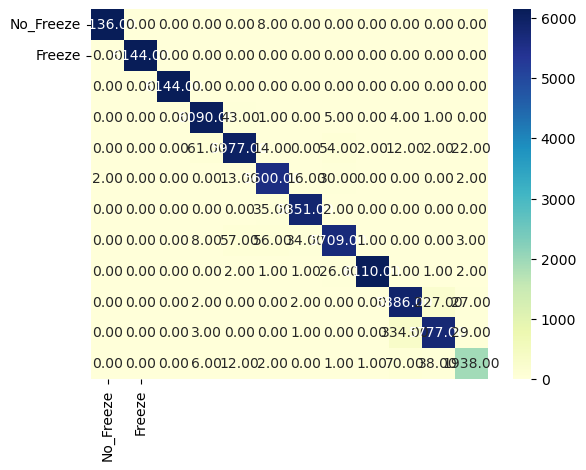

In [76]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')

# 나머지는 이전의 방식과 같습니다.

In [90]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(219644, 21, 1)
(68639, 21, 1)


In [91]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
enc.fit(y_train)

y_train_hot = enc.transform(y_train) 
y_test_hot = enc.transform(y_test) 
y_val_hot = enc.transform(y_val)

In [92]:
n_status = len(np.unique(y_train_hot))
n_status

2

In [93]:
idx = np.random.permutation(len(X_train))
X_train = X_train[idx]
y_train_hot = y_train_hot[idx]

In [97]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, mlp_dropout, dropout):
    model = Sequential()
    # Transformer 블록 추가 (단일 블록 예시)
    model.add(Flatten(input_shape=input_shape))  # 입력 데이터의 형태를 1D로 변환
    # Transformer 레이어 (여기서는 예시로 Dense 레이어를 사용)
    model.add(Dense(head_size, activation='relu'))
    # 다중 층 퍼셉트론 (MLP) 구성
    for dim in mlp_units:
        model.add(Dense(dim, activation='relu'))
        model.add(Dropout(mlp_dropout))
    # 최종 출력 레이어
    model.add(Dense(12, activation='softmax'))  # 12개의 클래스를 예측하는 출력 레이어

    return model

input_shape = X_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="categorical_crossentropy",  # 다중 클래스 분류에 적합한 손실 함수
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

In [98]:
train_epochs = 30
history = model.fit(X_train, y_train_hot, epochs=train_epochs, verbose=True,  validation_split = 0.1)

Epoch 1/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 5s 738us/step - accuracy: 0.0865 - loss: 3.6950 - val_accuracy: 0.0916 - val_loss: 2.4674
Epoch 2/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 717us/step - accuracy: 0.0891 - loss: 2.4661 - val_accuracy: 0.0886 - val_loss: 2.4624
Epoch 3/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step - accuracy: 0.0908 - loss: 2.4622 - val_accuracy: 0.0880 - val_loss: 2.4610
Epoch 4/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step - accuracy: 0.0892 - loss: 2.4613 - val_accuracy: 0.0862 - val_loss: 2.4606
Epoch 5/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 709us/step - accuracy: 0.0889 - loss: 2.4610 - val_accuracy: 0.0865 - val_loss: 2.4606
Epoch 6/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 712us/step - accuracy: 0.0902 - loss: 2.4604 - val_accuracy: 0.0877 - val_loss: 2.4616
Epoch 7/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 712us/step - accuracy: 0.0895 - loss: 2.4602 - val_accuracy: 0.0863 - val_loss: 2.4604
Epoch 8/30
6178/6178 ━━━━━━━━━━━━━━━━━━━━ 4s 710us/step - accuracy: 0.0913 -

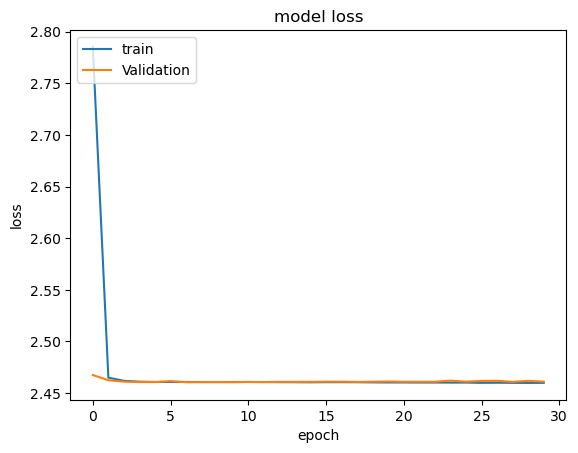

In [99]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

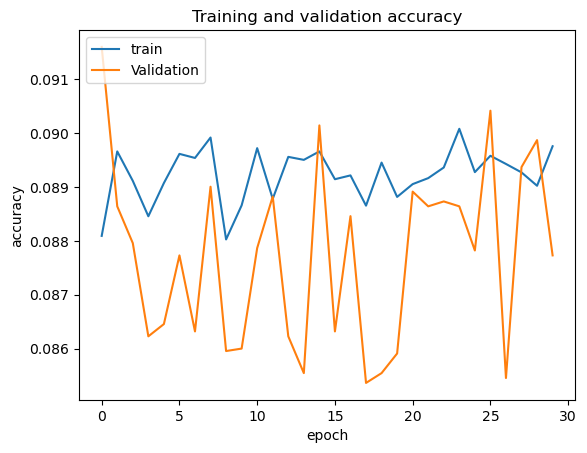

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training and validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='upper left')

2145/2145 ━━━━━━━━━━━━━━━━━━━━ 1s 521us/step
f1_score =  0.01735202528637156
0.090619035825114
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6144
           1       0.09      1.00      0.17      6144
           2       0.00      0.00      0.00      6144
           3       0.01      0.00      0.00      6144
           4       0.03      0.00      0.00      6144
           5       0.33      0.01      0.01      5663
           6       0.00      0.00      0.00      5888
           7       0.00      0.00      0.00      5868
           8       0.22      0.00      0.01      6144
           9       0.01      0.00      0.00      6144
          10       0.01      0.00      0.00      6144
          11       0.00      0.00      0.00      2068

    accuracy                           0.09     68639
   macro avg       0.06      0.08      0.02     68639
weighted avg       0.06      0.09      0.02     68639



C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

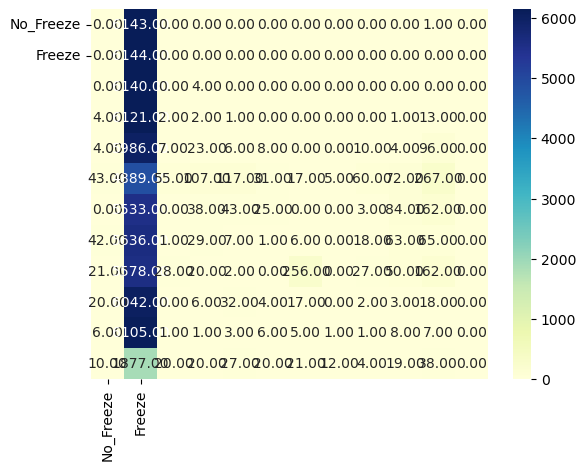

In [101]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import numpy as np

y_pred=model.predict(X_test)
y_pred = np.argmax(y_pred, axis=-1)
y_true = np.argmax(y_test_hot, axis=-1)

LABELS = ['No_Freeze','Freeze']
cm=confusion_matrix(y_true,y_pred)

#print(cm)
print('f1_score = ', f1_score(y_true, y_pred, average='weighted'))
print(accuracy_score(y_true,y_pred))
print(classification_report(y_true,y_pred))
sns.heatmap(cm, cmap="YlGnBu", xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt = '.2f')